In [ ]:
!pip install opendatasets

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import opendatasets as od
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import re

In [ ]:
import warnings
warnings.filterwarnings('ignore')

{"username":"kothayeshwanth","key":"43f35fe285da94314f92bd198e92704b"}

In [ ]:
od.download("https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kothayeshwanth
Your Kaggle Key: ··········


100%|██████████| 109k/109k [00:00<00:00, 548kB/s]

In [ ]:
df = pd.read_csv('used-car-price-prediction-dataset/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [ ]:
df['milage'].str.split(" ", expand = True).head()

,0,1
0,"51,000",mi.
1,"34,742",mi.
2,"22,372",mi.
3,"88,900",mi.
4,"9,835",mi.


In [ ]:
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(int)

In [ ]:
df['milage']

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: int64

In [ ]:
df['engine'].str.split(' ',expand = True)

,0,1,2,3,4,5,6,7,8,9
0,300.0HP,3.7L,V6,Cylinder,Engine,Flex,Fuel,Capability,None,None
1,3.8L,V6,24V,GDI,DOHC,None,None,None,None,None
2,3.5,Liter,DOHC,None,None,None,None,None,None,None
3,354.0HP,3.5L,V6,Cylinder,Engine,Gas/Electric,Hybrid,None,None,None
4,2.0L,I4,16V,GDI,DOHC,Turbo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
4004,6.0L,W12,48V,PDI,DOHC,Twin,Turbo,None,None,None
4005,349.0HP,3.0L,V6,Cylinder,Engine,Gasoline,Fuel,None,None,None
4006,Electric,None,None,None,None,None,None,None,None,None
4007,450.0HP,3.5L,V6,Cylinder,Engine,Gasoline,Fuel,None,None,None


In [ ]:
split_engine = df['engine'].str.split(' ',expand = True)

split_engine.loc[split_engine[0].str.contains('HP'), 'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'), 0].str.replace('HP', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 'cylinders'] = split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 2].str.replace('V', "").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinders'] = 6

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull())][2].str.replace('L', '')

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)

In [ ]:
df[['engine', 'horsepower', 'litres', 'cylinders']].head()

,engine,horsepower,litres,cylinders
0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,300.0,3.7,6.0
1,3.8L V6 24V GDI DOHC,NaN,3.8,6.0
2,3.5 Liter DOHC,NaN,3.5,NaN
3,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,354.0,3.5,6.0
4,2.0L I4 16V GDI DOHC Turbo,NaN,2.0,4.0


In [ ]:
df[['engine', 'horsepower', 'litres', 'cylinders']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   engine      4009 non-null   object 
 1   horsepower  3199 non-null   float64
 2   litres      3790 non-null   object 
 3   cylinders   3623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 125.4+ KB


In [ ]:
df.loc[df['ext_col'].str.contains('Black'), 'exterior_color'] = 'Black'
df.loc[df['ext_col'].str.contains('White'), 'exterior_color'] = 'White'
df['exterior_color'].fillna('Other', inplace = True)

In [ ]:
df.loc[df['int_col'].str.contains('Black'), 'interior_color'] = 'Black'
df.loc[df['int_col'].str.contains('White'), 'interior_color'] = 'White'
df['interior_color'].fillna('Other', inplace = True)

In [ ]:
df['accident'] = df['accident'].replace('At least 1 accident or damage reported',1)
df.loc[df['accident'] != 1, 'accident'] = 0

df['clean_title'] = df['clean_title'].replace('Yes', 1).fillna(0)

In [ ]:
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
df['accident'].fillna('No', inplace=True)
df['clean_title'].fillna('No', inplace=True)


In [ ]:
df['price'] = df['price'].str.replace('$', "").str.replace(',', "").astype(int)

In [ ]:
df['price']

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

In [ ]:
df['litres']

0       3.7
1       3.8
2       3.5
3       3.5
4       2.0
       ... 
4004    6.0
4005    3.0
4006    NaN
4007    3.5
4008    2.0
Name: litres, Length: 4009, dtype: object

In [ ]:
df['litres'] = pd.to_numeric(df['litres'], errors='coerce')

print(df['litres'].head())

0    3.7
1    3.8
2    3.5
3    3.5
4    2.0
Name: litres, dtype: float64


In [ ]:
df['accident']

0       1
1       1
2       0
3       0
4       0
       ..
4004    0
4005    0
4006    0
4007    0
4008    1
Name: accident, Length: 4009, dtype: object

In [ ]:
df['accident'] = df['accident'].astype(int)

print(df['accident'].head())

0    1
1    1
2    0
3    0
4    0
Name: accident, dtype: int64


In [ ]:
df['litres'] = df['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

In [ ]:
# Check the distribution of 'horsepower', 'litres', and 'cylinders'
print(df['horsepower'].describe())
print(df['litres'].describe())
print(df['cylinders'].describe())

df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['litres'].fillna(df['litres'].median(), inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)


count    3199.000000
mean      332.283839
std       122.247883
min        70.000000
25%       248.000000
50%       310.000000
75%       400.000000
max      1020.000000
Name: horsepower, dtype: float64
count    3931.000000
mean      271.122005
std       168.878346
min         1.200000
25%       178.500000
50%       290.000000
75%       382.000000
max      1020.000000
Name: litres, dtype: float64
count    3623.000000
mean        6.233508
std         1.751425
min         3.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        24.000000
Name: cylinders, dtype: float64


In [ ]:
# Updated categorization of transmission types
df['tsm'] = df['transmission'].str.strip()

automatic_patterns = 'automatic|a/t|at|auto|cvt|variable|overdrive switch'
manual_patterns = 'm/t|manual|mt|6-speed|7-speed'
dct_patterns = 'dual shift mode'

df.loc[df['tsm'].str.contains(automatic_patterns, case=False, na=False), 'tsm'] = 'Automatic'
df.loc[df['tsm'].str.contains(manual_patterns, case=False, na=False), 'tsm'] = 'Manual'
df.loc[df['tsm'].str.contains(dct_patterns, case=False, na=False), 'tsm'] = 'DCT'

other_patterns = '–|2|f|single-speed fixed gear|scheduled for or in production'
df.loc[df['tsm'].str.contains(other_patterns, case=False, na=False), 'tsm'] = 'Other'

df['tsm'].fillna('Other', inplace=True)

print(df['tsm'].value_counts())

Automatic    3225
DCT           398
Manual        375
Other          11
Name: tsm, dtype: int64


In [ ]:
df['fuel'] = df['fuel_type'].fillna('Electric')
df['fuel'] = df['fuel'].str.strip()
df.loc[df['fuel'].str.contains('hybrid', case=False, na=False), 'fuel'] = 'Hybrid'
df.loc[df['fuel'].str.contains('–', case=False, na=False), 'fuel'] = 'Other'
df.loc[df['fuel'] == 'not supported', 'fuel'] = 'Other'
print(df['fuel'].value_counts())

Gasoline         3479
Hybrid            228
E85 Flex Fuel     139
Diesel            116
Other              47
Name: fuel, dtype: int64


In [ ]:
# Remove the columns 'transmission', 'ext_col', 'int_col', and 'fuel_type' from the DataFrame
df.drop(columns=['transmission', 'ext_col', 'int_col', 'fuel_type'], inplace=True)

In [ ]:
# For each categorical column, get the value counts to understand the distribution of categories

categorical_columns = ['brand', 'model', 'fuel', 'tsm', 'exterior_color', 'interior_color']

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for brand:
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           4009 non-null   object 
 1   model           4009 non-null   object 
 2   model_year      4009 non-null   int64  
 3   milage          4009 non-null   int64  
 4   engine          4009 non-null   object 
 5   accident        4009 non-null   int64  
 6   clean_title     4009 non-null   float64
 7   price           4009 non-null   int64  
 8   horsepower      4009 non-null   float64
 9   litres          4009 non-null   float64
 10  cylinders       4009 non-null   float64
 11  exterior_color  4009 non-null   object 
 12  interior_color  4009 non-null   object 
 13  tsm             4009 non-null   object 
 14  fuel            4009 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 469.9+ KB


In [ ]:
df.nunique()

brand               57
model             1898
model_year          34
milage            2818
engine            1146
accident             2
clean_title          2
price             1569
horsepower         348
litres             392
cylinders            9
exterior_color       3
interior_color       3
tsm                  4
fuel                 5
dtype: int64

In [ ]:
df.describe()

,model_year,milage,accident,clean_title,price,horsepower,litres,cylinders
count,4009.000000,4009.000000,4009.000000,4009.000000,4.009000e+03,4009.000000,4009.000000,4009.000000
mean,2015.515590,64717.551010,0.245947,0.851334,4.455319e+04,327.781492,271.489299,6.211025
std,6.104816,52296.599459,0.430701,0.355803,7.871064e+04,109.564563,167.247327,1.666378
min,1974.000000,100.000000,0.000000,0.000000,2.000000e+03,70.000000,1.200000,3.000000
25%,2012.000000,23044.000000,0.000000,1.000000,1.720000e+04,268.000000,180.000000,6.000000
50%,2017.000000,52775.000000,0.000000,1.000000,3.100000e+04,310.000000,290.000000,6.000000
75%,2020.000000,94100.000000,0.000000,1.000000,4.999000e+04,381.000000,381.000000,8.000000
max,2024.000000,405000.000000,1.000000,1.000000,2.954083e+06,1020.000000,1020.000000,24.000000


In [ ]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
engine            0
accident          0
clean_title       0
price             0
horsepower        0
litres            0
cylinders         0
exterior_color    0
interior_color    0
tsm               0
fuel              0
dtype: int64

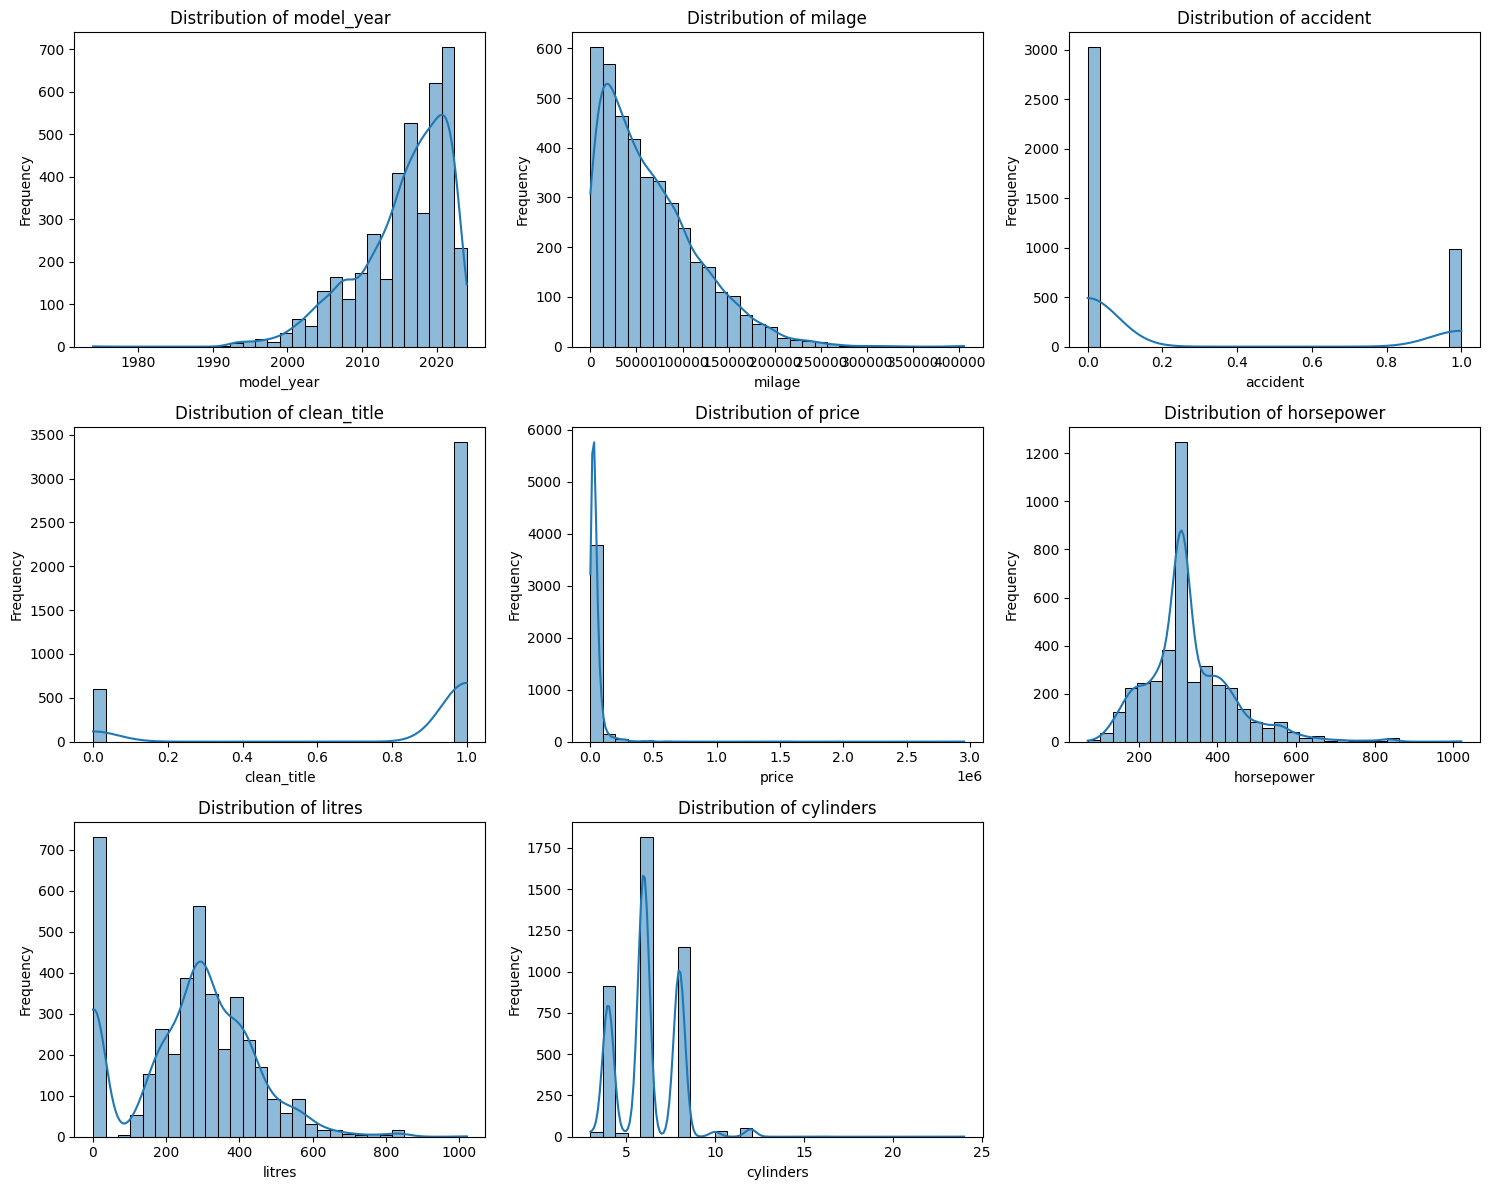

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Ensure enough rows to accommodate all plots

plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['price']

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

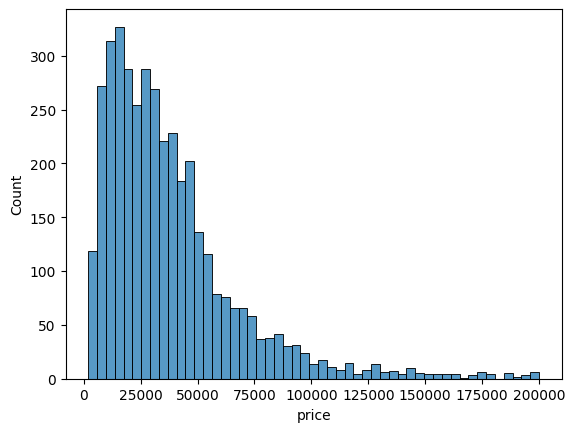

In [ ]:
sns.histplot(data = df[df['price']<=200000]['price'])
plt.show()

In [ ]:
df = df[df['price']<=200000].copy().reset_index(drop = True)

In [ ]:
df.describe()

,model_year,milage,accident,clean_title,price,horsepower,litres,cylinders
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,2015.453482,65805.607016,0.250127,0.855363,37884.626080,326.268175,272.707016,6.160651
std,6.113616,52180.621732,0.433141,0.351779,29948.902974,108.161790,163.934582,1.605551
min,1974.000000,100.000000,0.000000,0.000000,2000.000000,70.000000,1.200000,3.000000
25%,2012.000000,24285.000000,0.000000,1.000000,17000.000000,268.000000,182.000000,6.000000
50%,2017.000000,54000.000000,0.000000,1.000000,30500.000000,310.000000,290.000000,6.000000
75%,2020.000000,95000.000000,0.750000,1.000000,48000.000000,381.000000,381.000000,8.000000
max,2024.000000,405000.000000,1.000000,1.000000,200000.000000,1020.000000,1020.000000,24.000000


In [ ]:
print(df['litres'].unique())
print(df[['engine', 'litres']].sample(10))


[ 300.     3.8    3.5  354.     2.     2.4  292.   282.   311.   534.
    6.   715.   382.   400.   375.   305.   287.   550.   120.     3.
  355.   276.     1.8  445.   362.   345.   383.   180.   211.   173.
  240.   552.     4.4  536.   310.     5.3  228.   268.   503.   325.
  208.   250.     1.5  200.   420.     5.2  302.   306.   237.   248.
  425.   582.   444.   335.   424.   340.   225.   365.   315.   199.
  560.   326.   165.     1.6  835.   241.     5.7  215.   130.     6.2
  288.     5.   369.   195.   285.     3.6  485.   132.   416.   360.
  280.   620.   290.   265.     2.5  469.   169.   330.   275.   303.
  450.   651.   255.   455.     4.   182.   236.   370.   212.   565.
  230.   171.   252.   220.     1.3  188.     2.3  235.   320.   138.
  291.   523.     4.7  440.     5.6  181.     5.8  429.   263.   210.
    6.4  404.   670.   563.   283.   150.   266.   328.   304.   381.
  493.     2.9    1.2  760.   329.   239.   160.   402.   166.   390.
  147.   357.   271

In [ ]:
# Define a function to extract the engine size in litres from the engine description
def extract_litres(engine_str):
    match = re.search(r'(\d+\.\d+|\d+)\s*L', engine_str)
    return float(match.group(1)) if match else None

df['litres'] = df['engine'].apply(extract_litres)

print(df['litres'].unique())
print(df[['engine', 'litres']].sample(10))


[3.7  3.8  3.5  2.   2.4  4.4   nan 5.2  3.   5.   3.6  2.2  5.3  1.8
 5.7  2.7  6.   4.   1.5  6.1  1.6  2.9  3.3  3.4  2.5  6.2  4.3  6.75
 5.5  5.6  6.3  5.4  6.7  4.6  4.5  4.7  1.3  2.3  3.2  5.8  6.8  6.4
 4.2  1.2  1.7  7.   3.9  2.8  6.6  1.4  4.8  7.4  5.9  8.1  0.65 8.3
 2.1  6.5  7.3  1.  ]
                                                 engine  litres
163        248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel     2.0
2245  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...     3.0
1309                                5.3L V8 16V GDI OHV     5.3
2477  425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...     3.0
1231      616.0HP 6.0L 12 Cylinder Engine Gasoline Fuel     6.0
295                     4.0L V8 32V GDI DOHC Twin Turbo     4.0
2574       225.0HP 4.6L 8 Cylinder Engine Gasoline Fuel     4.6
3677       300.0HP 5.4L 8 Cylinder Engine Gasoline Fuel     5.4
740        471.0HP 5.0L 8 Cylinder Engine Gasoline Fuel     5.0
1191       445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel  

In [ ]:
df['litres'].fillna(df['litres'].median(), inplace=True)

In [ ]:
df.describe()

,model_year,milage,accident,clean_title,price,horsepower,litres,cylinders
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,2015.453482,65805.607016,0.250127,0.855363,37884.626080,326.268175,3.651945,6.160651
std,6.113616,52180.621732,0.433141,0.351779,29948.902974,108.161790,1.370308,1.605551
min,1974.000000,100.000000,0.000000,0.000000,2000.000000,70.000000,0.650000,3.000000
25%,2012.000000,24285.000000,0.000000,1.000000,17000.000000,268.000000,2.500000,6.000000
50%,2017.000000,54000.000000,0.000000,1.000000,30500.000000,310.000000,3.500000,6.000000
75%,2020.000000,95000.000000,0.750000,1.000000,48000.000000,381.000000,4.600000,8.000000
max,2024.000000,405000.000000,1.000000,1.000000,200000.000000,1020.000000,8.300000,24.000000


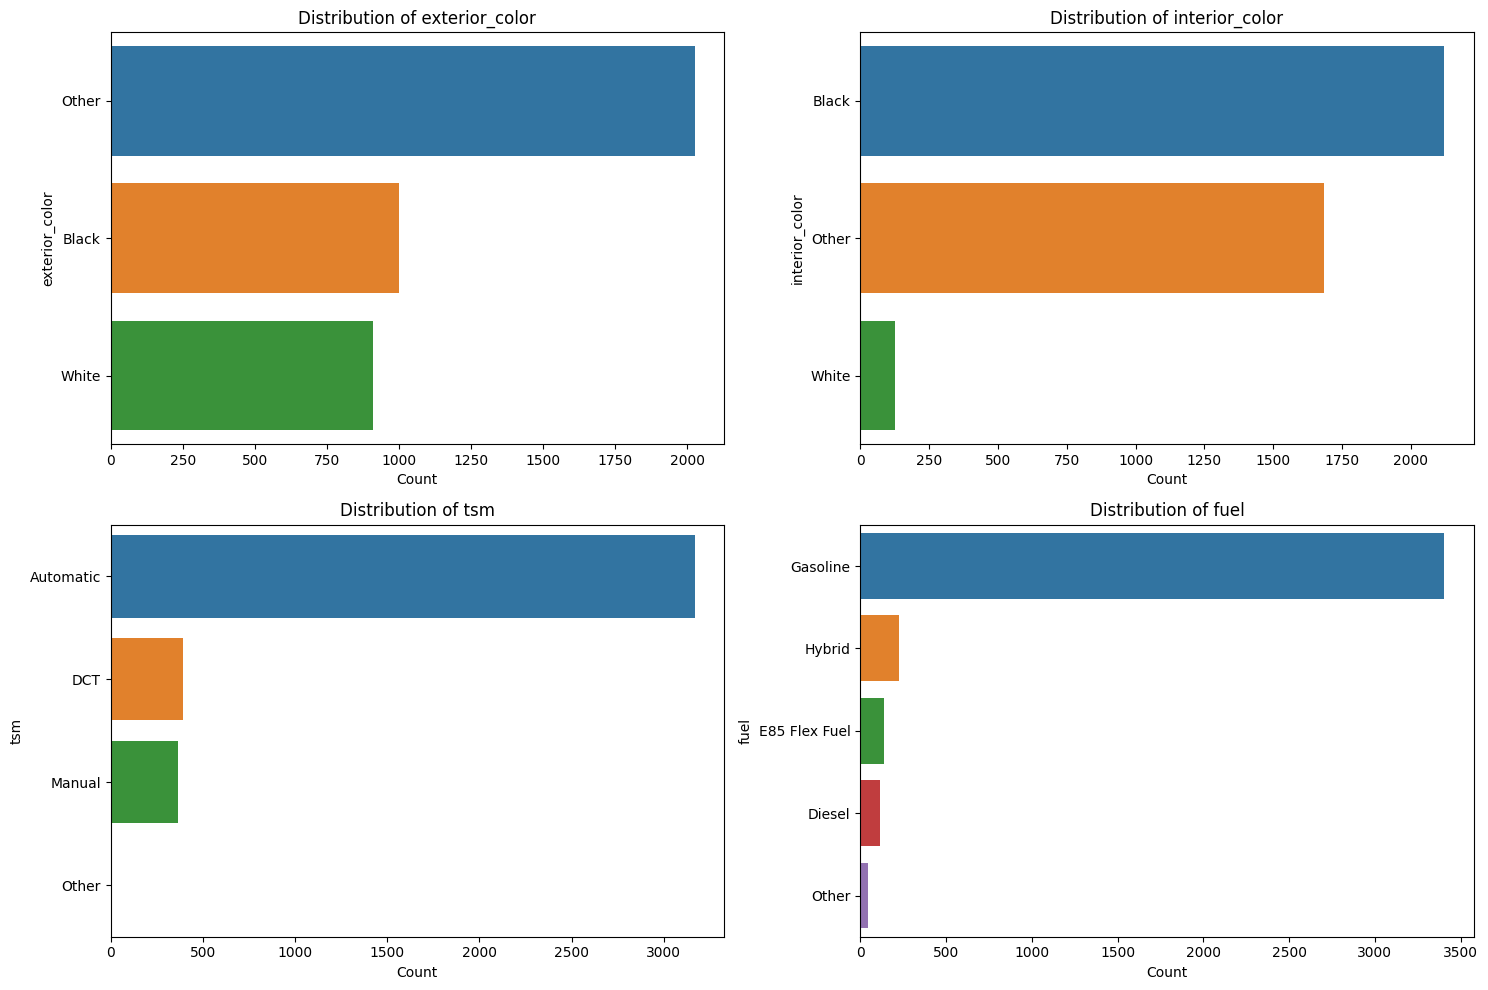

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['brand', 'model', 'engine']]

num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    category_counts = df[column].value_counts()
    sns.barplot(x=category_counts.values, y=category_counts.index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


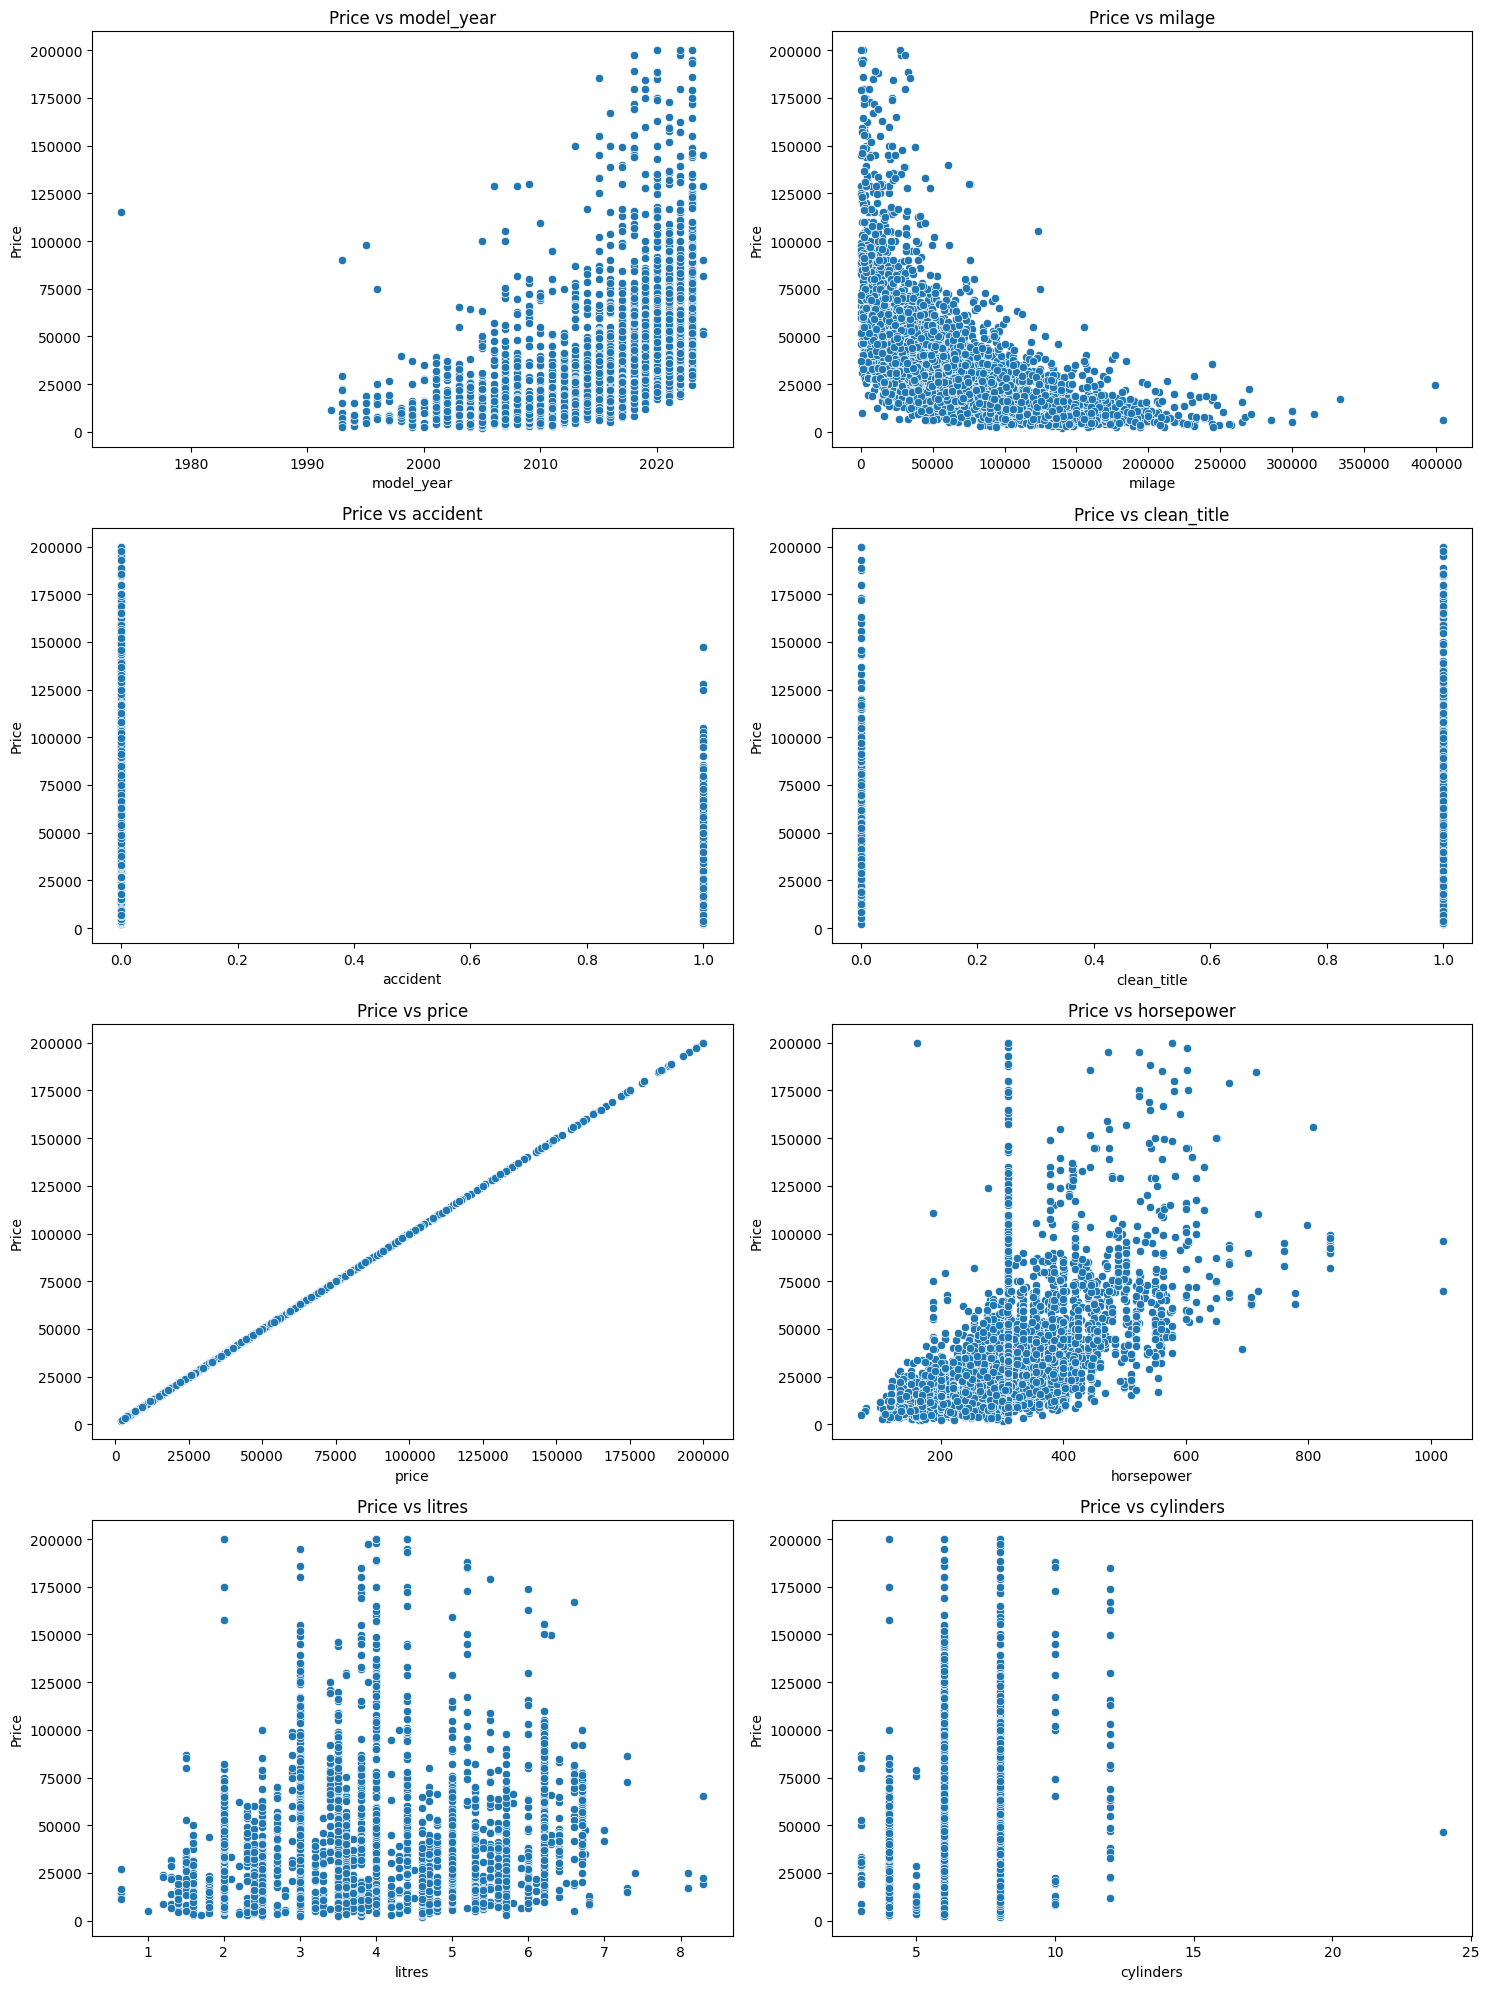

In [ ]:
# Plot scatter plots of each numerical feature against price
num_plots = len(numerical_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

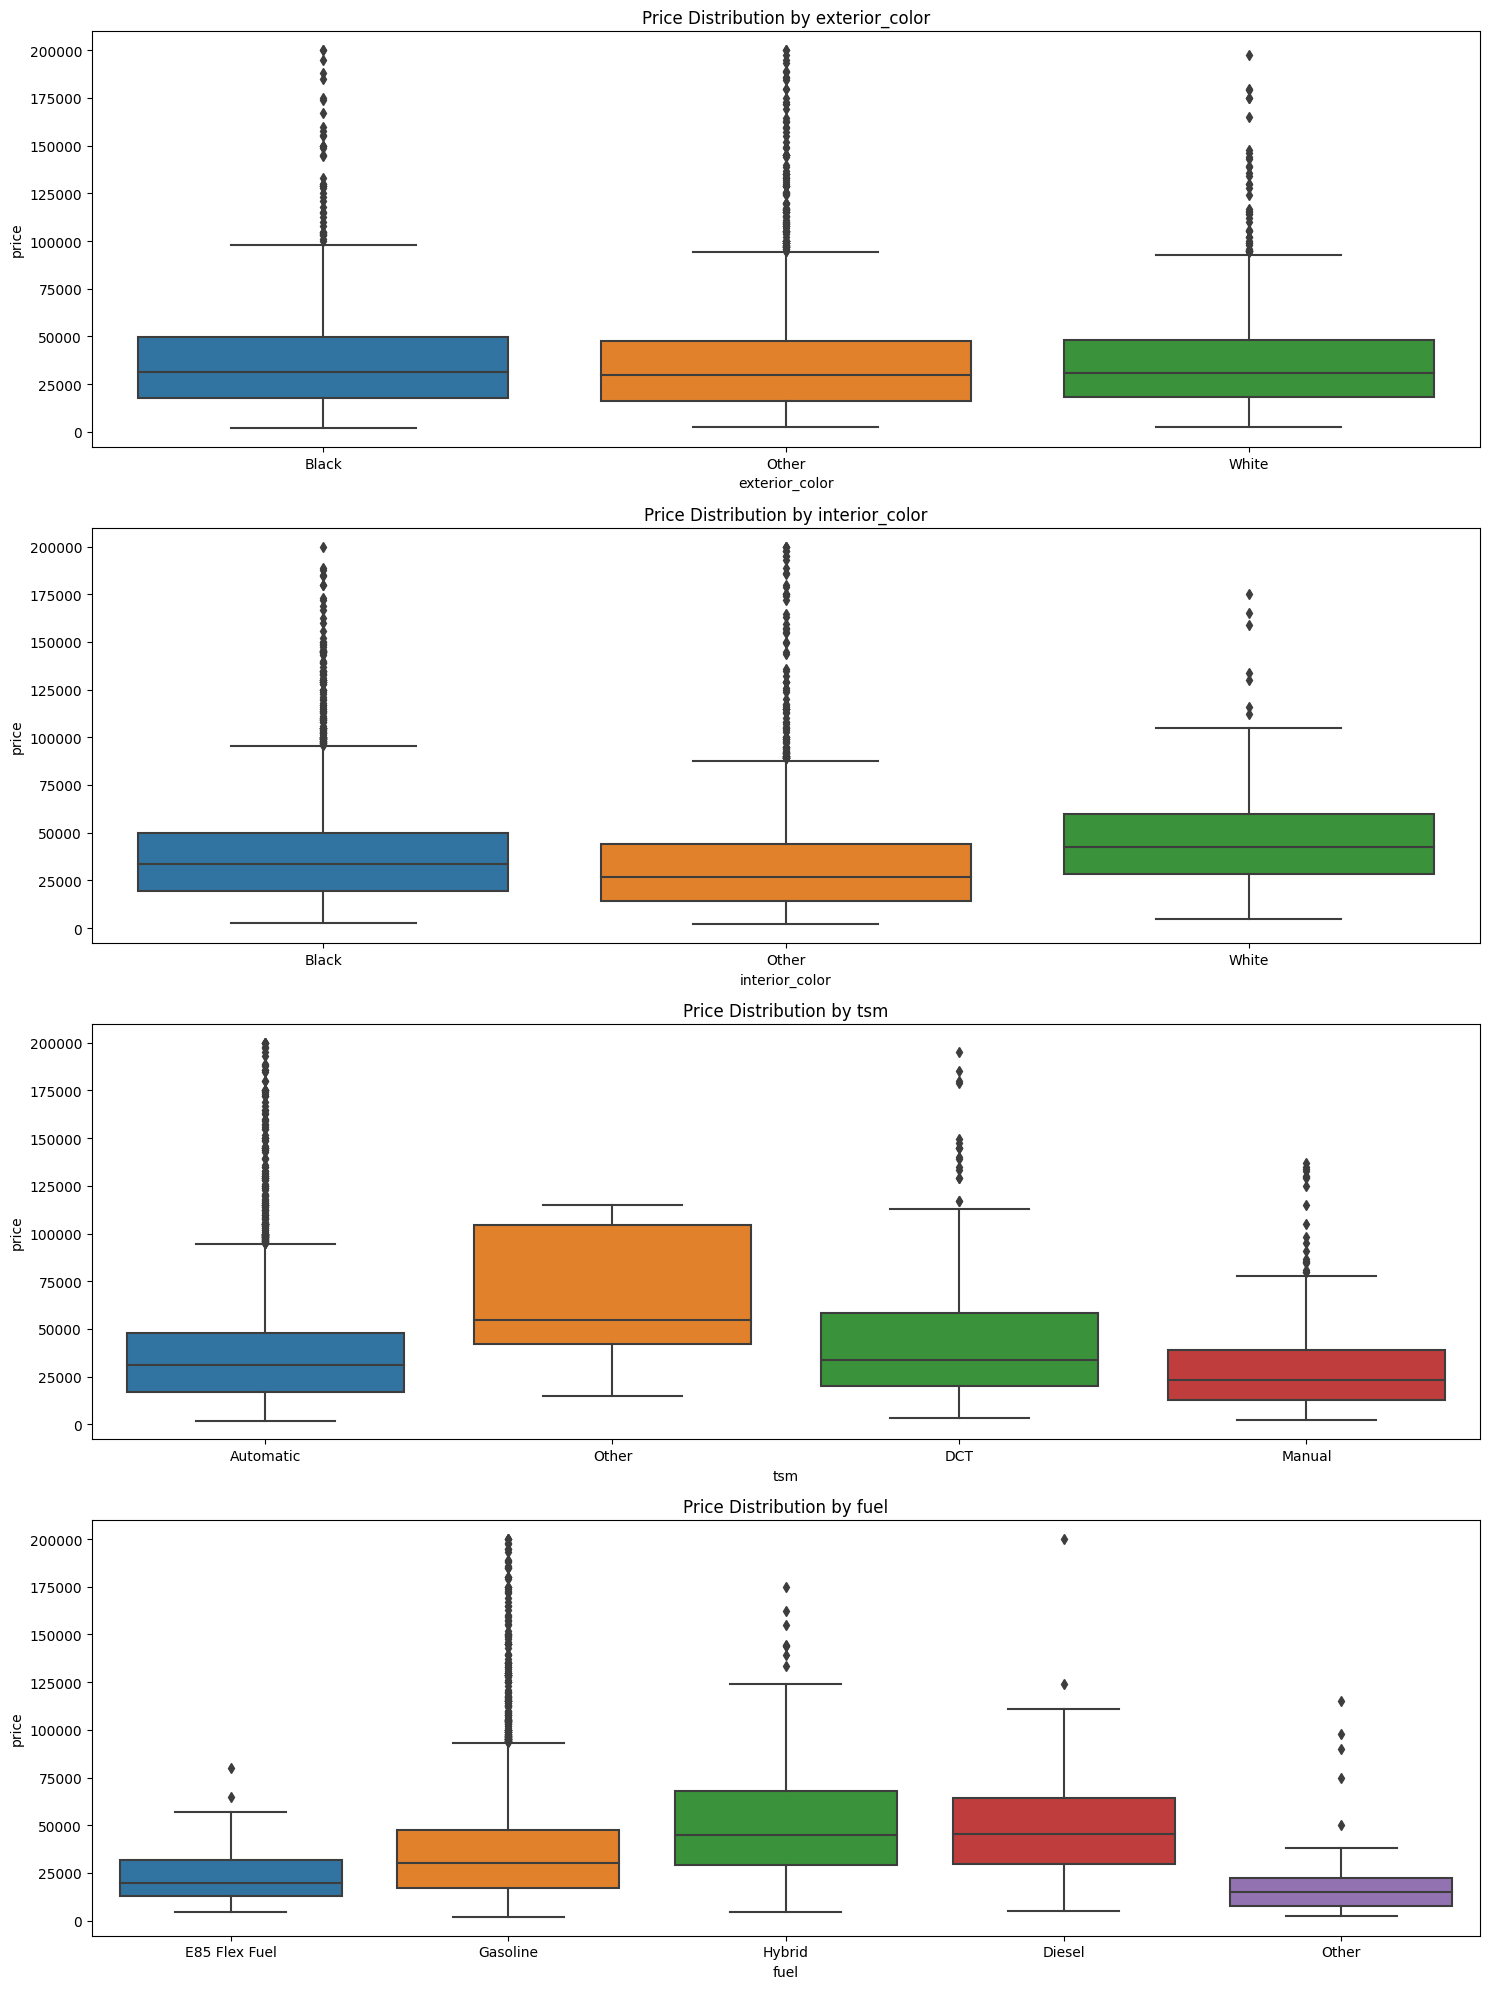

In [ ]:
boxplot_rows = len(categorical_columns)
boxplot_cols = 1

plt.figure(figsize=(15, boxplot_rows * 5))
for i, cat_col in enumerate(categorical_columns):
    plt.subplot(boxplot_rows, boxplot_cols, i+1)
    sns.boxplot(data=df, x=cat_col, y='price')
    plt.title(f'Price Distribution by {cat_col}')
plt.tight_layout()
plt.show()

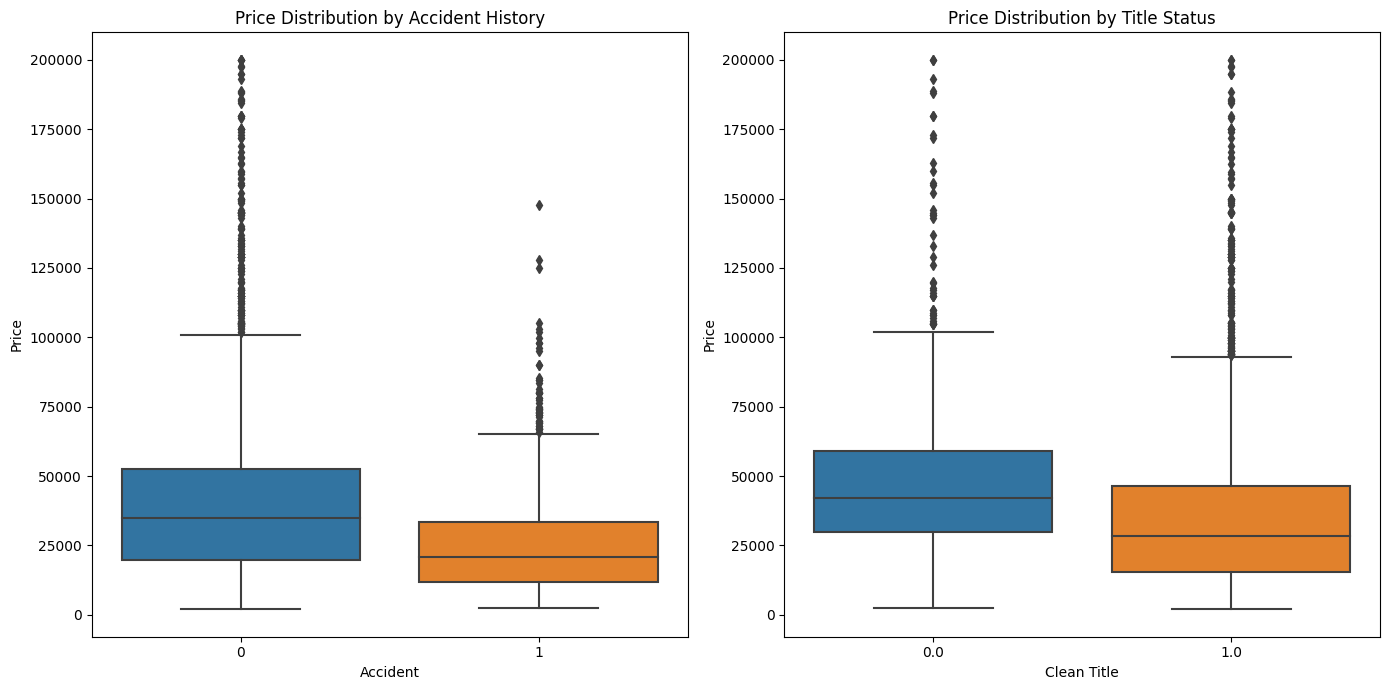

In [ ]:
df['accident'] = df['accident'].astype('category')
df['clean_title'] = df['clean_title'].astype('category')

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='accident', y='price', data=df)
plt.title('Price Distribution by Accident History')
plt.xlabel('Accident')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.boxplot(x='clean_title', y='price', data=df)
plt.title('Price Distribution by Title Status')
plt.xlabel('Clean Title')
plt.ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()


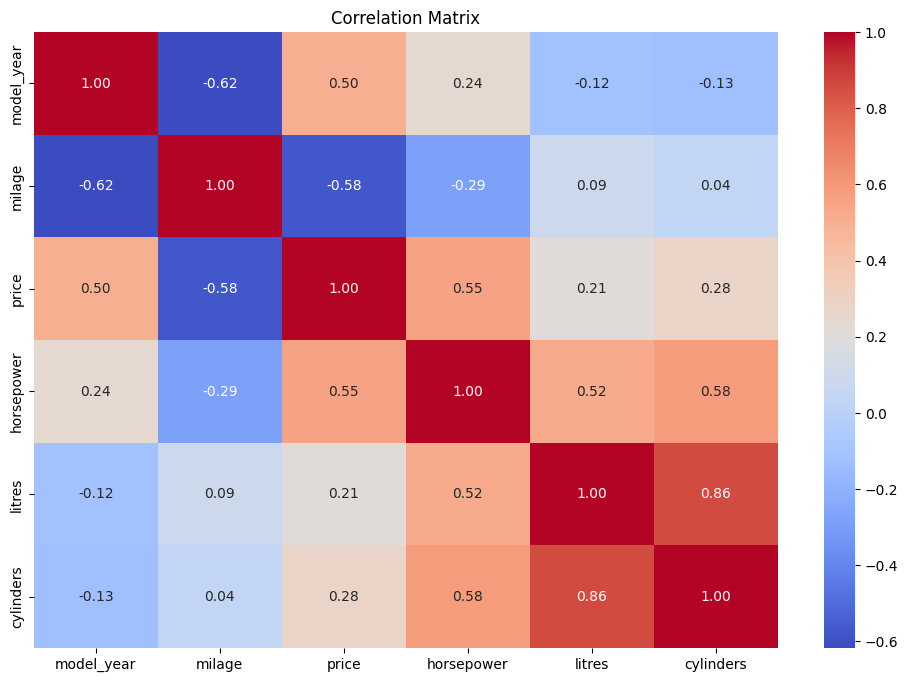

price         1.000000
horsepower    0.553058
model_year    0.503705
cylinders     0.283414
litres        0.212688
milage       -0.577455
Name: price, dtype: float64


In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)

print(price_correlation)

In [ ]:
df.drop(['model', 'brand', 'engine'], axis=1)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

test_df_encoded = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

test_df_encoded = test_df_encoded.reindex(columns = train_df_encoded.columns, fill_value=0)


In [ ]:
# Instantiate the scaler
scaler = RobustScaler()

train_df_encoded_scaled = scaler.fit_transform(train_df_encoded)
test_df_encoded_scaled = scaler.transform(test_df_encoded)

train_df_encoded_scaled = pd.DataFrame(train_df_encoded_scaled, columns=train_df_encoded.columns)
test_df_encoded_scaled = pd.DataFrame(test_df_encoded_scaled, columns=test_df_encoded.columns)


In [ ]:
X_train = train_df_encoded_scaled.drop('price', axis=1)
y_train = train_df_encoded_scaled['price']
X_test = test_df_encoded_scaled.drop('price', axis=1)
y_test = test_df_encoded_scaled['price']

In [ ]:
#Ridge Model
imputer = SimpleImputer(strategy='mean')

ridge_pipe = make_pipeline(imputer, Ridge())

ridge_pipe.fit(X_train, y_train)

y_pred = ridge_pipe.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"\n RMSE: {ridge_rmse}")
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r_squared)


 RMSE: 0.3953803320670492
Mean Absolute Error (MAE): 0.25051340006556055
Coefficient of Determination (R^2): 0.8163706799277757


In [ ]:
#Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_reg.fit(X_train, y_train)

y_pred = random_forest_reg.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r_squared)

RMSE: 0.391199
Mean Absolute Error (MAE): 0.23182600456340258
Coefficient of Determination (R^2): 0.8202336495069533


In [ ]:
#Deep learning Model

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

y_pred = model.predict(X_test).flatten()

loss = model.evaluate(X_test, y_test)
print("RMSE:", loss)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r_squared)

Epoch 1/100
79/79 [==============================] - 3s 17ms/step - loss: 0.4770 - val_loss: 0.2094
Epoch 2/100
79/79 [==============================] - 1s 12ms/step - loss: 0.1735 - val_loss: 0.1566
Epoch 3/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0729 - val_loss: 0.1595
Epoch 4/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0366 - val_loss: 0.1446
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.0266 - val_loss: 0.1466
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 0.0183 - val_loss: 0.1406
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 0.0149 - val_loss: 0.1406
Epoch 8/100
79/79 [==============================] - 1s 9ms/step - loss: 0.0128 - val_loss: 0.1394
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 0.0113 - val_loss: 0.1492
Epoch 10/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0108 - val_loss: 0.1383
Epoch

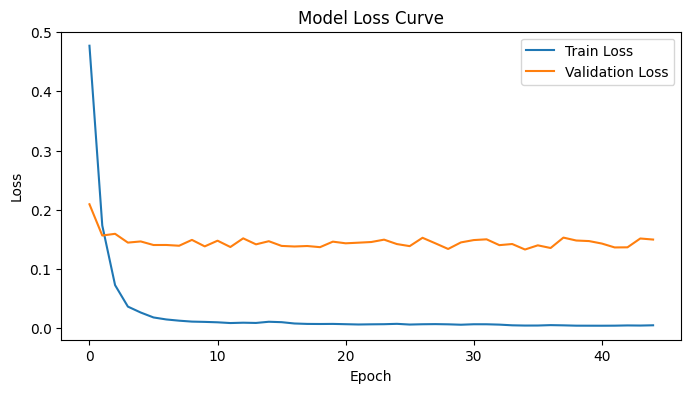

In [ ]:
# Plotting the loss curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## **Best model based on taking all the different factors like MSE, MAE, R^2 into consideration is Deep Learning for our Dataset**